In [93]:
import pandas
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, KMeans
import seaborn as sns

import matplotlib.pyplot as plt

In [94]:
df=pd.read_csv('./data/natural_products3.csv', index_col='CHEMBL_ID')
df = df.dropna()
df

,Is_Natural_Product,Is_Anaglesic
CHEMBL_ID,,
CHEMBL485,1,1
CHEMBL70,1,1
CHEMBL113,1,0
CHEMBL3,1,0
CHEMBL517712,1,0
CHEMBL170,1,0
CHEMBL4596781,0,0
CHEMBL4803817,0,0
CHEMBL4597035,0,0


## TSNE

In [95]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=300)
tsne_results = tsne.fit_transform(df)

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 11 samples in 0.000s...
[t-SNE] Computed neighbors for 11 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 11 / 11
[t-SNE] Mean sigma: 0.622395
[t-SNE] KL divergence after 250 iterations with early exaggeration: -26.420189
[t-SNE] KL divergence after 300 iterations: -7.726741


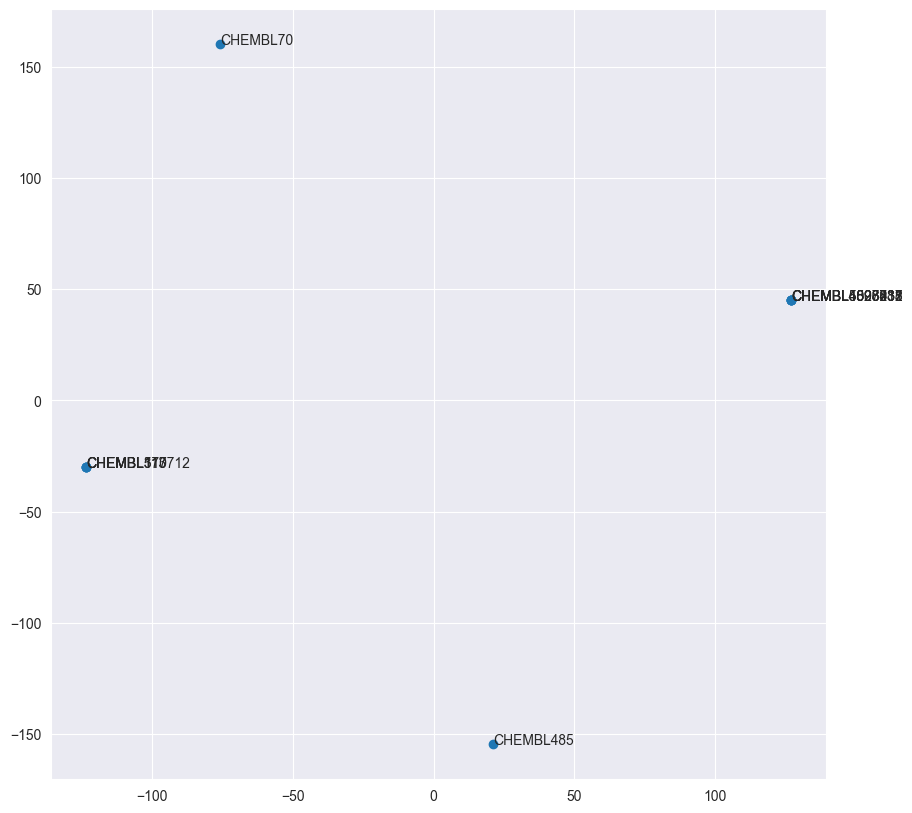

In [96]:
plt.figure(figsize=(10,10))
plt.scatter(tsne_results[:,0], tsne_results[:,1])
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i,0], tsne_results[i,1], df.iloc[i].name)
plt.show()

## K-means clustering

In [97]:
#kmeans from the TSNE results
km = KMeans(n_clusters=2)
km.fit(df)


KMeans(n_clusters=2)

In [98]:
df['cluster'] = km.labels_
df

,Is_Natural_Product,Is_Anaglesic,cluster
CHEMBL_ID,,,
CHEMBL485,1,1,0
CHEMBL70,1,1,0
CHEMBL113,1,0,0
CHEMBL3,1,0,0
CHEMBL517712,1,0,0
CHEMBL170,1,0,0
CHEMBL4596781,0,0,1
CHEMBL4803817,0,0,1
CHEMBL4597035,0,0,1


In [99]:
clusters = df.groupby('cluster')

In [100]:
cluster_centers = km.cluster_centers_
cluster_centers

array([[ 1.00000000e+00,  3.33333333e-01],
       [ 0.00000000e+00, -2.77555756e-17]])

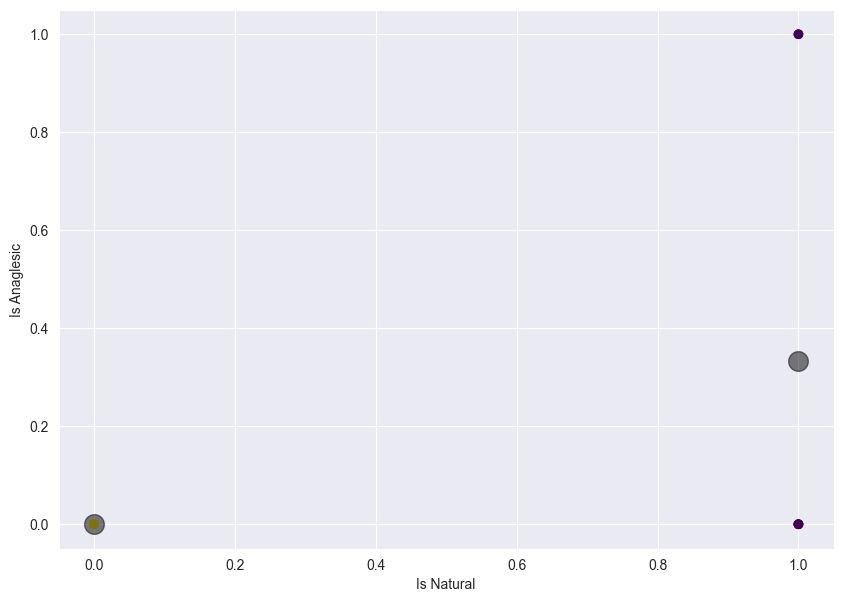

In [101]:
#plot the clusters scatter chart
plt.figure(figsize=(10, 7))
plt.scatter(df['Is_Natural_Product'], df['Is_Anaglesic'], c=df['cluster'], cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('Is Natural')
plt.ylabel('Is Anaglesic')
plt.show()
